## DV1597 Assignment 2
Group 9


***
Viktor Fransson

vifr22@student.bth.se

***

Tobias Gustafsson

togu22@studen.bth.se
***

#### Initialize

In [211]:
# Import packages
import pandas as pd
import matplotlib.pyplot as mpl # Version 3.8.4
import matplotlib.dates as mdates
import seaborn as sb
import numpy as np
import scipy.stats as stats
import calendar
import geopandas as gpd
from IPython.display import display, HTML, display_html
from shapely.geometry import Polygon

In [85]:
# Load datasets
PATH = 'Assignment 2_datasets/'
df_daily = pd.read_csv(PATH + '1.COVID-19_daily_number_of_new_cases_and_deaths.csv')
df_vaccination = pd.read_csv(PATH + '2.COVID-19_vaccination.csv')
df_admissions = pd.read_csv(PATH + '3.COVID-19_hospital_and_ICU_admission_rates.csv')

#### Reported cases dataset

cases - Number of newly reported cases \
deaths - Number of newly reported deaths \
popData2020 - Eurostat 2020 data (inhabitants)

In [86]:
df_daily # 1

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2020,continentExp
0,23/10/2022,23,10,2022,3557.0,0.0,Austria,AT,AUT,8901064,Europe
1,22/10/2022,22,10,2022,5494.0,4.0,Austria,AT,AUT,8901064,Europe
2,21/10/2022,21,10,2022,7776.0,4.0,Austria,AT,AUT,8901064,Europe
3,20/10/2022,20,10,2022,8221.0,6.0,Austria,AT,AUT,8901064,Europe
4,19/10/2022,19,10,2022,10007.0,8.0,Austria,AT,AUT,8901064,Europe
...,...,...,...,...,...,...,...,...,...,...,...
28724,08/02/2020,8,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
28725,07/02/2020,7,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
28726,06/02/2020,6,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe
28727,05/02/2020,5,2,2020,0.0,0.0,Sweden,SE,SWE,10327589,Europe


#### Vaccination

"The data presented in the Vaccine Tracker are submitted by European Union/European Economic
Area (EU/EEA) countries to ECDC through The European Surveillance System (TESSy) once every
four weeks on Tuesdays. EU/EEA countries report aggregated data on the number of vaccine
doses distributed by manufacturers to the country, the number of first, second, additional and
unspecified doses administered to adults (18+), adolescent and children (<18) overall, by age
groups and in specific target groups, such as healthcare workers (HCWs) and in residents in long-
term care facilities (LTCFs). Doses are also reported by vaccine product."

YeakWeekISO - Date when the vaccine was received/administered. Only weeks are allowed (e.g. “2021-W01”). \
Denominator - Population denominators for target groups (total population and age- specific population obtained from Eurostat/UN). \
NumberDosesReceived - Number of vaccine doses distributed by the manufacturers to the country during the reporting week. \
FirstDose - Number of first dose vaccine administered to individuals during the reporting week. \
FirstDoseRefused - Number of individuals refusing the first vaccine dose. \
DoseUnk - Number of doses administred during the reported week where the type of dose was not specified. \
TargetGroup - Target group for vaccination.

In [87]:
df_vaccination # 2

,YearWeekISO,ReportingCountry,Denominator,NumberDosesReceived,NumberDosesExported,FirstDose,FirstDoseRefused,SecondDose,DoseAdditional1,DoseAdditional2,DoseAdditional3,DoseAdditional4,DoseAdditional5,UnknownDose,Region,TargetGroup,Vaccine,Population
0,2021-W05,AT,423433.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age10_14,AZ,8932664
1,2023-W10,AT,1543886.0,0.0,0.0,0,NaN,1,0,0,0,0,0,0,AT,Age<18,NVXD,8978929
2,2023-W10,AT,1047888.0,0.0,0.0,1,NaN,0,0,1,0,0,0,0,AT,Age60_69,NVXD,8978929
3,2023-W10,AT,258398.0,0.0,0.0,0,NaN,0,0,0,0,0,0,0,AT,Age15_17,MODBA.1,8978929
4,2023-W10,AT,7388778.0,0.0,0.0,3,NaN,1,4,80,53,0,0,0,AT,ALL,MOD,8978929
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681325,2021-W25,SK,NaN,0.0,0.0,2,NaN,0,0,0,0,0,0,0,SK,AgeUNK,MOD,5459781
681326,2021-W25,SK,4431608.0,0.0,0.0,3665,NaN,0,0,0,0,0,0,0,SK,ALL,SPU,5459781
681327,2021-W25,SK,159879.0,0.0,0.0,1,NaN,0,0,0,0,0,0,0,SK,Age15_17,SPU,5459781
681328,2021-W25,SK,388502.0,0.0,0.0,99,NaN,0,0,0,0,0,0,0,SK,Age18_24,SPU,5459781


In [88]:
df_admissions # 3

,country,indicator,date,year_week,value,source,url
0,Austria,Daily hospital occupancy,2020-04-01,2020-W14,856.000000,Country_Website,NaN
1,Austria,Daily hospital occupancy,2020-04-02,2020-W14,823.000000,Country_Website,NaN
2,Austria,Daily hospital occupancy,2020-04-03,2020-W14,829.000000,Country_Website,NaN
3,Austria,Daily hospital occupancy,2020-04-04,2020-W14,826.000000,Country_Website,NaN
4,Austria,Daily hospital occupancy,2020-04-05,2020-W14,712.000000,Country_Website,NaN
...,...,...,...,...,...,...,...
25095,Sweden,Weekly new ICU admissions per 100k,2023-03-26,2023-W12,0.066971,TESSy COVID-19 combined sources,NaN
25096,Sweden,Weekly new ICU admissions per 100k,2023-04-02,2023-W13,0.133941,TESSy COVID-19 combined sources,NaN
25097,Sweden,Weekly new ICU admissions per 100k,2023-04-09,2023-W14,0.105240,TESSy COVID-19 combined sources,NaN
25098,Sweden,Weekly new ICU admissions per 100k,2023-04-16,2023-W15,0.105240,TESSy COVID-19 combined sources,NaN


***


### Part 1

***
#### 1.
Since 2020 till 2022, which top 10 countries reported the most number of cases of COVID-19 in quarters per year (Q1-Q4 in each year)? Do you find these numbers relatively high compared to the country’s population? Do you see any connection among these countries regarding their geographical locations and the period in which most cases are observed? Discuss your observations.

In [213]:
# Create a copy and add datetime column
df = df_daily.copy()
df['Time'] = pd.to_datetime(df['dateRep'], format='%d/%m/%Y')
df.set_index('Time', inplace=True)

# # Country population data
# df_pop = df_daily.copy().groupby('countriesAndTerritories').first().reset_index()
# df_pop.drop(['dateRep', 'day','month', 'year', 'cases','deaths', 'geoId','countryterritoryCode', 'continentExp'], axis=1, inplace=True)
# print(df_pop)
#     # group['Pop'] = (int)(df_pop[df_pop['countriesAndTerritories'] == group['Country']]['popData2020'])
#     # group['Deaths per million'] = df_pop[df_pop['countriesAndTerritories'] == group['Country']]['popData2020']

# Divide into quarters
quarters = df.resample('QE')

# Calculate totalt deaths per quarter for each country
styled_dfs = []
quarterly_dfs = {}
for name, quarter_df in quarters:
    group = quarter_df.groupby('countriesAndTerritories')['deaths'].sum().reset_index()
    group = group.sort_values('deaths', ascending=False).reset_index(drop=True)
    group.rename(columns = {'countriesAndTerritories':'Country', 'deaths':'Deaths'}, inplace = True)
    group.index += 1
    styled_dfs.append(group.head(10).style.format(precision=0).format_index(str.upper, axis=1))

# Format output
html_output = "<div style='display: flex; flex-wrap: wrap;'>"
html_output += "<h2>2020</h2>"
html_output += "</div><div style='display: flex; flex-wrap: wrap;'>"
for i, styled_df in enumerate(styled_dfs):
    html_output += "<div style='width: 23%; padding: 2px;'> Q"+str((i)%4+1)
    html_output += styled_df.to_html()
    html_output += "</div>"
    if (i + 1) % 4 == 0:
        html_output += "</div><div style='display: flex; flex-wrap: wrap;'>"
    if i == 3:
        html_output += "<h2>2021</h2>"
        html_output += "</div><div style='display: flex; flex-wrap: wrap;'>"
    if i == 7:
        html_output += "<h2>2022</h2>"
        html_output += "</div><div style='display: flex; flex-wrap: wrap;'>"
html_output += "</div>"
display_html(html_output,raw=True)

,COUNTRY,DEATHS
1,Italy,12428
2,Spain,10389
3,France,3523
4,Germany,2683
5,Belgium,1411
6,Netherlands,1018
7,Sweden,332
8,Portugal,214
9,Austria,124
10,Denmark,110


***
#### 2.
Visualize each country’s total number of cases and deaths on a map plot using their geographical locations in 2020, 2021, and 2022. Discuss your observations.

C:\Users\Tobias\AppData\Local\Temp\ipykernel_11000\3883803046.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


<Axes: >

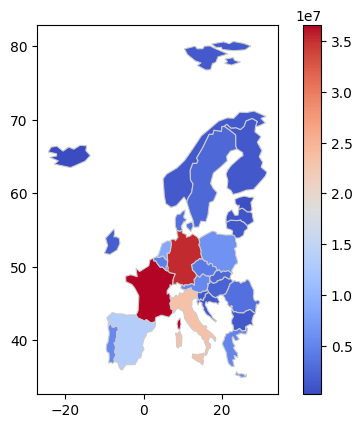

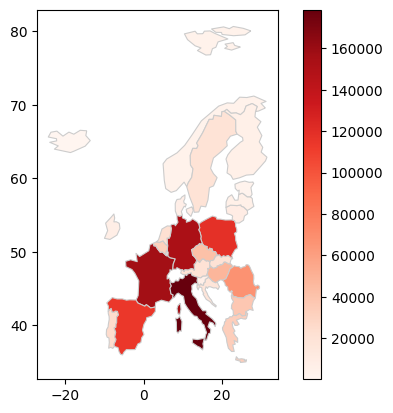

In [212]:
# Create dataframes that sums all deaths and cases
df_deaths = df_daily.groupby('countriesAndTerritories')['deaths'].sum().reset_index()
df_cases = df_daily.groupby('countriesAndTerritories')['cases'].sum().reset_index()

# Load European map data from geopandas datasets
europe = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
europe = europe[europe['continent'] == 'Europe']

# Code to remove a french territory far away from europe
coordinates = ""
start = False
for char in str(europe.iat[2,5]):
    if char == ")":
        break
    if char == "-":
        start = True
    if start:
        coordinates += char

coordinates = [tuple(map(float, coord.split(' '))) for coord in coordinates.split(', ')]

coordinates = Polygon(coordinates)
europe.iat[2, 5] = europe.iat[2, 5].difference(coordinates)

# Merge dataframes with the European map based on the 'country' column
cases_map = europe.merge(df_cases, left_on='name', right_on='countriesAndTerritories')
deaths_map = europe.merge(df_deaths, left_on='name', right_on='countriesAndTerritories')

# Plotting the merged data, coloring countries based on cases or deaths
cases_map.plot(column='cases', cmap='coolwarm', linewidth=0.8, edgecolor='0.8', legend=True)
deaths_map.plot(column='deaths', cmap='Reds', linewidth=0.8, edgecolor='0.8', legend=True)

***
#### 3.
What are the top 3 popular vaccine brands that have been used across the EU/EEA? Can you observe the same popularity at the country level? Are there any exceptions?

***
#### 4.
Considering the previous question, which target groups mainly received these vaccine brands in each country?

***
#### 5.
Which countries are the most skeptical towards the first dose of the COVID-19 vaccine? Do you think this matter had any impact on the hospitalization level?

***
#### 6.
Rank all EU/EEA countries, based on their vaccinated population under age 18 for the first dose of the COVID-19 vaccine, which countries have the most and least vaccinated people under age 18 in regards to their total populations?

***
#### 7.
Which countries have the oldest vaccinated population for the **second** dose of the COVID-19 vaccine in regards to their total population?

***
#### 8.
Which countries’ health care was most affected by the coronavirus pandemic in 2020 compared to others? How are these statistics in 2022?